In [1]:
from datetime import datetime

import time
import os
import sys
from pathlib import Path

import numpy as np
from scipy.stats import lognorm
import pandas as pd

from astropy import stats
import astropy.units as u

import matplotlib
#matplotlib.use('nbagg')

from matplotlib import style
style.use('ggplot')
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib widget

In [2]:
rootdir = Path("/Volumes/LaCie 8TB/wfsdat")
# use find to make this csv list
with open(rootdir / "reanalyze_csvs_2019_q2.txt") as f:
    csvs = f.readlines()

# loop through the csv files and read them with pandas
frames = []
for csv in csvs:
    frames.append(pd.read_csv(rootdir / csv.rstrip()))

# now concat each frame into one big frame containing all of the data
data = pd.concat(frames)

In [3]:
g = data.groupby('wfs')
g.wfs.describe()

,count,unique,top,freq
wfs,,,,
binospec,6877,1,binospec,6877
f5,701,1,f5,701
mmirs,1892,1,mmirs,1892
newf9,253,1,newf9,253


In [4]:
# re-calculate the seeing using updated spot FWHM for binospec. filter out any NaN values...
#fixed_list = []
#for wfskey, group in g:
#    wfs = wfs_systems[wfskey]
#    group = g.get_group(wfskey)
#    #group.apply(seeing, axis=1, args=(wfs,))
#    group['fixed_raw_seeing'], group['fixed_seeing'] = seeing(group, wfs)
#    fixed_list.append(group)
#fixed = pd.concat(fixed_list)
#fixed.rename(index=str, columns={"seeing": "orig_seeing", "raw seeing": "orig_raw_seeing"}, inplace=True)
#fixed.rename(index=str, columns={"fixed_seeing": "seeing", "fixed_raw_seeing": "raw seeing"}, inplace=True)
fixed = data[np.isfinite(data['seeing'])]
fixed = fixed[fixed['fwhm'] > 0.]
fixed = fixed[fixed['seeing'] > 0.]
fixed = fixed[fixed['seeing'] < 4.]
fixed = fixed[fixed['time'] > "2019-01"]

In [5]:
fixed.sort_values(by='time')

,time,wfs,file,exptime,airmass,az,el,osst,outt,chamt,...,focerr,cc_x_err,cc_y_err,xcen,ycen,seeing,raw_seeing,fwhm,wavefront_rms,residual_rms
0,2019-04-01T02:39:23.141000,binospec,wfs_ff_cal_img_2019.0401.023923.fits,10.0,1.3061,216.504173,49.963706,7.55,4.5,4.620,...,-2.90,4.492,-2.471,260.494779,255.002666,1.258967,1.477748,7.097846,693.999854,1437.663124
1,2019-04-01T02:40:46.887000,binospec,wfs_ff_cal_img_2019.0401.024046.fits,10.0,1.3096,216.981413,49.783590,7.42,4.4,4.636,...,-7.25,0.108,0.000,258.997989,254.012775,1.341088,1.576669,7.472574,607.197684,1442.069504
2,2019-04-01T02:41:56.710000,binospec,wfs_ff_cal_img_2019.0401.024156.fits,30.0,1.3124,217.360817,49.637828,7.35,4.5,4.528,...,1.89,-0.000,-1.585,258.498706,254.498693,1.250797,1.472402,7.077508,227.487082,1411.248586
3,2019-04-01T02:42:31.125000,binospec,wfs_ff_cal_img_2019.0401.024231.fits,30.0,1.3139,217.555245,49.561363,7.33,4.5,4.544,...,0.63,-0.332,0.000,259.495068,254.499556,1.350594,1.590970,7.526497,334.123869,1483.614695
4,2019-04-01T02:43:04.503000,binospec,wfs_ff_cal_img_2019.0401.024304.fits,30.0,1.3153,217.740961,49.488676,7.35,4.5,4.534,...,-0.00,0.490,-0.025,258.997940,254.006411,1.348826,1.589904,7.522480,274.113596,1364.566279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2019-06-29T08:27:30.328000,binospec,wfs_ff_cal_img_2019.0629.082730.fits,40.0,1.3731,135.103391,46.738650,19.00,18.8,19.453,...,-4.64,-0.000,-0.848,287.013328,247.992468,1.476899,1.786373,8.257109,270.688331,1257.579326
104,2019-06-29T08:28:13.571000,binospec,wfs_ff_cal_img_2019.0629.082813.fits,40.0,1.3707,135.314191,46.847826,19.00,18.8,19.457,...,0.00,-0.000,-0.000,286.991534,248.002485,1.730431,2.090835,9.374293,425.365219,1227.116916
105,2019-06-29T08:28:56.815000,binospec,wfs_ff_cal_img_2019.0629.082856.fits,40.0,1.3683,135.522577,46.954879,19.00,18.8,19.250,...,4.16,0.000,-0.000,285.998008,248.014144,1.657968,2.001175,9.047824,446.157100,1581.625990
106,2019-06-29T08:29:40.167000,binospec,wfs_ff_cal_img_2019.0629.082940.fits,40.0,1.3659,135.735201,47.065235,19.00,18.8,19.086,...,-31.63,0.926,-1.884,287.991329,246.991772,1.598373,1.927212,8.776958,849.285028,1389.882239


In [6]:
# create a date-time index so we can group and analyze the data by timestamps
fixed = fixed.set_index(pd.DatetimeIndex(fixed['time'], name='ut'))

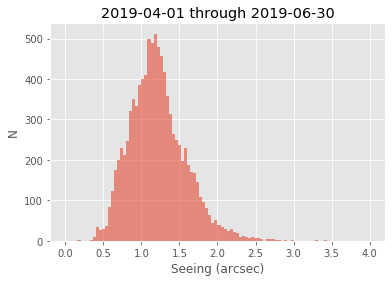

In [8]:
# make raw histogram of the zenith-corrected seeing column
fixed.hist(column='seeing', bins=100, range=(0.0, 4.0), alpha=0.6)
plt.title("2019-04-01 through 2019-06-30")
plt.xlabel("Seeing (arcsec)")
plt.ylabel("N")
plt.show()

In [9]:
# fit a log-normal distribution to the seeing data
sigma, loc, exp_mu = lognorm.fit(fixed['seeing'])
print(sigma, loc, exp_mu)
x = np.arange(0.0, 4.0, 0.01)
p = lognorm.pdf(x, sigma, loc=loc, scale=exp_mu)
mu = np.log(exp_mu)
mode = np.exp(mu - sigma**2) + loc
median = np.nanmedian(fixed['seeing'])
fit_median = exp_mu + loc

0.20483437012416683 -0.5560871108270198 1.7333298681709928


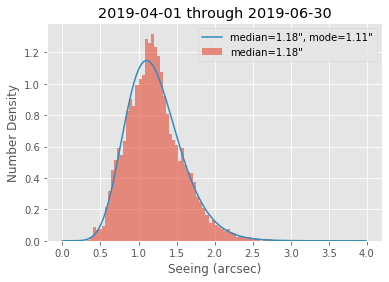

In [10]:
# plot normalized histogram with the fit and the median/mode calculated from the fit.
plt.hist(fixed['seeing'], density=True, bins=100, range=(0.0, 4.0), label="hist", alpha=0.6)
logp = plt.plot(x, p, label="logp")
plt.xlabel("Seeing (arcsec)")
plt.ylabel("Number Density")
plt.title("2019-04-01 through 2019-06-30")
plt.legend(["median=%.2f\", mode=%.2f\"" % (fit_median, mode), "median=%.2f\"" % (
    median
)])
plt.savefig("2019q2_hist.png")
plt.show()

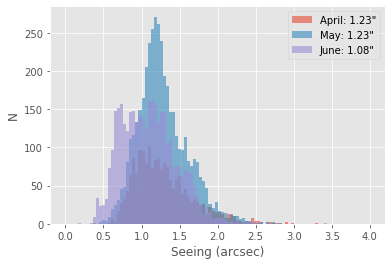

In [11]:
# panda time indexing makes it easy to group by month
months = {}
legends = []
months['April'] = fixed['2019-04']
months['May'] = fixed['2019-05']
months['June'] = fixed['2019-06']
for m in months:
    plt.hist(months[m]['seeing'], bins=100, range=(0.0, 4.0), label=m, alpha=0.6)
    legend = "%s: %.2f\"" % (m, np.median(months[m]['seeing']))
    legends.append(legend)
plt.legend(legends)
plt.xlabel("Seeing (arcsec)")
plt.ylabel("N")
#plt.title("Data and median seeing values grouped by month")
plt.savefig("2019q2_monthly.png")
plt.show()

In [13]:
len(months['April']), len(months['May']), len(months['June'])

(1856, 4179, 3674)

In [14]:
# now use the between_time() method to split the data into first and second halves of the night.
first_half = fixed.between_time(start_time='00:00', end_time='07:00')
second_half = fixed.between_time(start_time='07:00', end_time='14:00')
#first_half = months['December'].between_time(start_time='00:00', end_time='07:00')
#second_half = months['December'].between_time(start_time='07:00', end_time='14:00')
med_1st = np.median(first_half['seeing'])
med_2nd = np.median(second_half['seeing'])

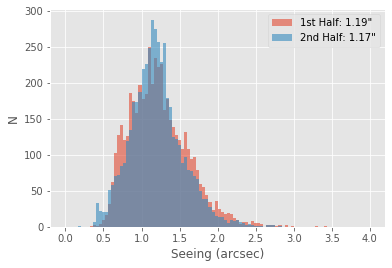

In [15]:
# plot the results and show that the seeing is better later in the night...
plt.hist(first_half['seeing'], bins=100, range=(0.0, 4.0), label="1st", alpha=0.6)
plt.hist(second_half['seeing'], bins=100, range=(0.0, 4.0), label="2nd", alpha=0.6)
plt.legend(["1st Half: %.2f\"" % med_1st, "2nd Half: %.2f\"" % med_2nd])
plt.xlabel("Seeing (arcsec)")
plt.ylabel("N")
#plt.title("Data and median seeing values grouped by half of the night")
plt.savefig("2019q2_1st2nd.png")
plt.show()

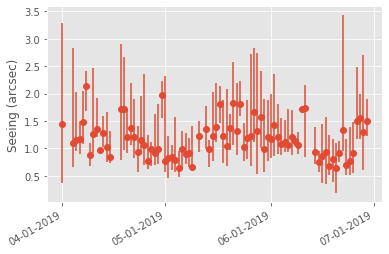

In [16]:
import matplotlib.dates as mdates

# make a new data frame that resamples the WFS data daily into the median, min, and max seeing for each day.
#fixed = fixed["2018-06-30":"2018-10-01"]
fig, ax = plt.subplots()
daily = pd.DataFrame()
daily['seeing'] = fixed.seeing.resample('D').median()
daily['max'] = fixed.seeing.resample('D').max()
daily['min'] = fixed.seeing.resample('D').min()
lowb = daily['seeing'] - daily['min']
upb = daily['max'] - daily['seeing']
plt.errorbar(daily.index, daily['seeing'], yerr=[lowb, upb], fmt='o')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d-%Y"))
fig.autofmt_xdate()
plt.ylabel("Seeing (arcsec)")
#plt.title("Nightly median seeing")
plt.savefig("2019q2_nightly.pdf")
plt.show()

In [17]:
date_list = list(daily.index.strftime('%Y-%m-%d'))
data = [np.array(fixed[date]['seeing']) for date in date_list]
clean_data = {}
for d, arr in zip(date_list, data):
    if len(arr) > 0:
        clean_data[d] = arr
date_labels = [datetime.strptime(d, "%Y-%m-%d").date() for d in clean_data.keys()]

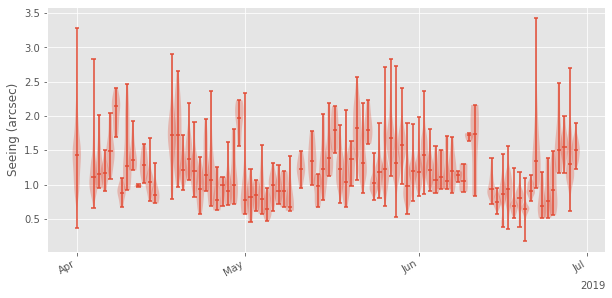

In [23]:
fig, ax = plt.subplots(figsize=(10,5))
plt.violinplot(clean_data.values(), mdates.date2num(date_labels), points=50, widths=1.5,
               showextrema=True, showmedians=True, bw_method='silverman')

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter("%m-%d-%Y"))
fig.autofmt_xdate()
plt.ylabel("Seeing (arcsec)")
plt.savefig("2019q2_violin.pdf")
plt.show()

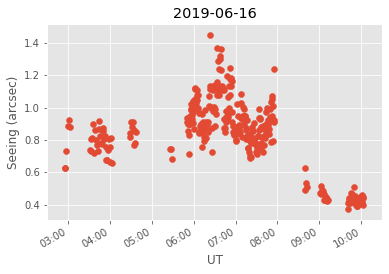

In [40]:
fig, ax = plt.subplots()
ax.scatter(fixed['2019-06-16'].index, fixed['2019-06-16']['seeing'])
ax.set_xlabel("UT")
ax.set_ylabel("Seeing (arcsec)")
ax.set_title("2019-06-16")
fig.autofmt_xdate()
ax.xaxis.set_major_locator(mdates.HourLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.set_xlim([datetime(2019, 6, 16, 2, 30, 0), datetime(2019, 6, 16, 10, 30, 0)])
plt.savefig("2019_06_16.pdf")
plt.show()

In [39]:
fixed.columns

Index(['time', 'wfs', 'file', 'exptime', 'airmass', 'az', 'el', 'osst', 'outt',
       'chamt', 'tiltx', 'tilty', 'transx', 'transy', 'focus', 'focerr',
       'cc_x_err', 'cc_y_err', 'xcen', 'ycen', 'seeing', 'raw_seeing', 'fwhm',
       'wavefront_rms', 'residual_rms'],
      dtype='object')

In [24]:
fixed.to_csv("june2019_seeing.csv")

In [34]:
fixed['2019-06-16']['az']

ut
2019-06-16 02:55:31    309.385732
2019-06-16 02:56:03    309.321670
2019-06-16 02:56:36    309.259700
2019-06-16 03:00:09    308.863485
2019-06-16 03:01:11    308.752666
2019-06-16 03:02:13    308.644359
2019-06-16 03:30:47    280.241633
2019-06-16 03:32:14    280.371141
2019-06-16 03:33:25    280.479180
2019-06-16 03:34:36    280.582316
2019-06-16 03:35:47    280.690914
2019-06-16 03:37:01    280.798706
2019-06-16 03:38:13    280.910297
2019-06-16 03:39:24    281.011749
2019-06-16 03:41:05    281.166340
2019-06-16 03:42:07    281.259231
2019-06-16 03:43:41    281.395487
2019-06-16 03:44:43    281.488592
2019-06-16 03:45:50    281.590741
2019-06-16 03:46:53    281.684318
2019-06-16 03:48:32    281.828739
2019-06-16 03:49:35    281.921597
2019-06-16 03:50:37    282.013843
2019-06-16 03:51:40    282.108761
2019-06-16 03:52:42    282.200697
2019-06-16 03:53:45    282.294177
2019-06-16 03:54:47    282.386306
2019-06-16 03:55:50    282.479647
2019-06-16 03:56:52    282.572902
2019-06-16 